In [25]:
import textract
import pandas as pd
import re
import nltk
from random import sample
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


In [26]:
texto=textract.process('review_pelicula.pdf')
str(texto)

"b'La Fiesta Silenciosa\\nLa visibilidad de los agravios, abusos y delitos sexuales hacia mujeres han tenido una trascendencia y\\nrelevancia durante los \\xc3\\xbaltimos a\\xc3\\xb1os como nunca antes. Los hilos de una sociedad machista y desigual\\nvan siendo cada vez m\\xc3\\xa1s visibles y eso tambi\\xc3\\xa9n logra reflejarse en las producciones audiovisuales.\\nLa Fiesta Silenciosa es un c\\xc3\\xbamulo de un mont\\xc3\\xb3n de situaciones de la sociedad. Hechos cotidianos que\\nsuceden en el silencio de la noche o a plena luz del d\\xc3\\xada, una opresi\\xc3\\xb3n asfixiante y contin\\xc3\\xbaa, que va\\nllenando un vaso al punto tal que una vez que se rebalsa no hay vuelta atr\\xc3\\xa1s.\\nDiego Fried logra consolidarse como un director a mirar de cerca en esta producci\\xc3\\xb3n, tercera dentro de\\nsu filmograf\\xc3\\xada (antes realiz\\xc3\\xb3 Vino y Sangrita, que no solo cuenta con una calidad actoral bien marcada,\\nsino logra narra esta historia con una tensi\\xc3\\xb

In [27]:
texto=texto.lower()
texto=re.sub(r"[^a-zA-Z'@#\s]", " ", str(texto))

In [28]:
texto=texto.split()
texto

["b'la",
 'fiesta',
 'silenciosa',
 'nla',
 'visibilidad',
 'de',
 'los',
 'agravios',
 'abusos',
 'y',
 'delitos',
 'sexuales',
 'hacia',
 'mujeres',
 'han',
 'tenido',
 'una',
 'trascendencia',
 'y',
 'nrelevancia',
 'durante',
 'los',
 'xc',
 'xbaltimos',
 'a',
 'xc',
 'xb',
 'os',
 'como',
 'nunca',
 'antes',
 'los',
 'hilos',
 'de',
 'una',
 'sociedad',
 'machista',
 'y',
 'desigual',
 'nvan',
 'siendo',
 'cada',
 'vez',
 'm',
 'xc',
 'xa',
 's',
 'visibles',
 'y',
 'eso',
 'tambi',
 'xc',
 'xa',
 'n',
 'logra',
 'reflejarse',
 'en',
 'las',
 'producciones',
 'audiovisuales',
 'nla',
 'fiesta',
 'silenciosa',
 'es',
 'un',
 'c',
 'xc',
 'xbamulo',
 'de',
 'un',
 'mont',
 'xc',
 'xb',
 'n',
 'de',
 'situaciones',
 'de',
 'la',
 'sociedad',
 'hechos',
 'cotidianos',
 'que',
 'nsuceden',
 'en',
 'el',
 'silencio',
 'de',
 'la',
 'noche',
 'o',
 'a',
 'plena',
 'luz',
 'del',
 'd',
 'xc',
 'xada',
 'una',
 'opresi',
 'xc',
 'xb',
 'n',
 'asfixiante',
 'y',
 'contin',
 'xc',
 'xbaa',
 

In [29]:
nltk.download('stopwords')
stopwords_sp = stopwords.words('spanish')
stopwords_sp.append('b')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/desktop/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
texto=[palabra for palabra in texto if palabra not in stopwords_sp]
texto

["b'la",
 'fiesta',
 'silenciosa',
 'nla',
 'visibilidad',
 'agravios',
 'abusos',
 'delitos',
 'sexuales',
 'hacia',
 'mujeres',
 'trascendencia',
 'nrelevancia',
 'xc',
 'xbaltimos',
 'xc',
 'xb',
 'nunca',
 'hilos',
 'sociedad',
 'machista',
 'desigual',
 'nvan',
 'siendo',
 'cada',
 'vez',
 'm',
 'xc',
 'xa',
 's',
 'visibles',
 'tambi',
 'xc',
 'xa',
 'n',
 'logra',
 'reflejarse',
 'producciones',
 'audiovisuales',
 'nla',
 'fiesta',
 'silenciosa',
 'c',
 'xc',
 'xbamulo',
 'mont',
 'xc',
 'xb',
 'n',
 'situaciones',
 'sociedad',
 'hechos',
 'cotidianos',
 'nsuceden',
 'silencio',
 'noche',
 'plena',
 'luz',
 'd',
 'xc',
 'xada',
 'opresi',
 'xc',
 'xb',
 'n',
 'asfixiante',
 'contin',
 'xc',
 'xbaa',
 'va',
 'nllenando',
 'vaso',
 'punto',
 'tal',
 'vez',
 'rebalsa',
 'vuelta',
 'atr',
 'xc',
 'xa',
 's',
 'ndiego',
 'fried',
 'logra',
 'consolidarse',
 'director',
 'mirar',
 'cerca',
 'producci',
 'xc',
 'xb',
 'n',
 'tercera',
 'dentro',
 'nsu',
 'filmograf',
 'xc',
 'xada',
 '

In [31]:
df_reviews=pd.DataFrame(columns=['Corpus'])
df_reviews

,Corpus


In [32]:
len(texto)

1333

In [35]:
for palabra in texto:             #Recorrer el array
      if len(palabra)<4:
            index=texto.index(palabra)
            texto.pop(index)

In [36]:
texto=sample(texto, 200)


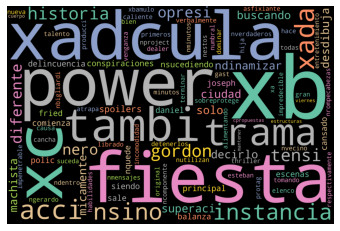

In [37]:
from wordcloud import WordCloud

palabras = texto
palabras=' '.join(texto)

text=palabras
wordcloud = WordCloud(background_color='black',width=3000, height=2000, max_words=100, random_state=1, colormap='Set2', collocations=False).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()